# Integrals and Normalizing Functions

(adapted from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 8 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Understand how to normalize functions using integrals

## Integrals and Probability

An integral in one dimension computes the area under a curve. If we take an integral over "everything," it's equivalent to adding up all the area.

For example, the [Maxwell-Boltzmann distribution](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution) gives the probability of an ideal gas molecule moving at various velocities as a function of the mass of the molecule and the temperature.

Image from Wikipedia (at 298.15K):
<a href="https://commons.wikimedia.org/wiki/File:MaxwellBoltzmann-en.svg#/media/File:MaxwellBoltzmann-en.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/MaxwellBoltzmann-en.svg/1200px-MaxwellBoltzmann-en.svg.png" alt="MaxwellBoltzmann-en.svg"></a>

For $^4\mathrm{He}$ the most likely speed is clearly ~1,100 m/s, but a large fraction of gas molecules have velocities slower or faster than that.

If we take:

$$
\int_0^{\infty} f(x) dx = 1
$$

Naturally, the total of *all* probabilities should be 100%.

As a result, sometimes we need to ***normalize*** functions - scale them by a constant to ensure that the total is 100%.

### Example - Particle in a Box

In quantum mechanics, wavefunctions $\psi$ have no known meaning - they could be complex numbers. On the other hand, the product $\psi^* \psi$ should represent the probability, e.g. of finding an electron at a particular point or region of space.

The "particle in a box" model assumes an electron is confined to a one-dimensional system, for example, a conjugated polymer:

<img src="./images/acetylene.png" width="250" />

If the length of the box is $L$, the lowest energy wavefunction is:

$$
\psi = N \sin \left(\frac{\pi x}{L}\right)
$$

The notation $\psi^*$ reflects the complex conjugate of the wavefunction. (Remember the complex conjugate?)

So what we need is a constant $N$ to normalize the wavefunction:

$$
\int_{0}^{L} N^2 \sin \left(\frac{\pi x}{L}\right)\sin \left(\frac{ \pi x}{L}\right) d x = 1
$$

That is, we're assuming the electron is *somewhere* inside the box from $0 < x < L$, so the integral should take the area of everything inside the box and add up to 100%.

Let's do this with an [integral table](http://integral-table.com/) but pick your favorite method.

$$
\int \sin ^{2} a x \quad d x=\frac{x}{2}-\frac{\sin 2 a x}{4 a}
$$

Here $a = \pi/L$ and we'll need to remember the **normalization constant** - which we can pull out of the integral:

$$
N^2 \int \sin ^{2} a x \quad d x = N^2 \left[\frac{x}{2} - \frac{\sin 2 \pi x/L}{4 \pi / L}  \right]^L_0 = 1
$$

$$
N^2 \left(\frac{L}{2} - 0 - 0 - 0\right) = 1
$$

So $N = \sqrt{2/L}$

$$
\psi = \sqrt{2/L} \sin \left(\frac{\pi x}{L}\right)
$$

Phew! 😅

<div class="alert alert-block alert-success">

Normalizing functions requires some work, but it ensures we can consider probabilities accurately.
    
The electron must be *somewhere* - and if there's only one, it should only add up to 100%.
    
</div>

## Integration over Multiple Variables

Another good example is the $1s$ orbital for a hydrogen atom. We won't go into how we get the answer, but:
- we know it should be spherically symmetric
- we know it should contain one electron (and only one)

$$
\psi(r, \theta, \phi) = N e^{-r/a_0}
$$

Where $a_0$ is the Bohr radius ${\approx}0.5292 Å$. Notice that for the $1s$ orbital, there's no $\theta$ or $\phi$ component, so the wavefunction is spherically symmetric.

So we need to normalize $\psi$ to find the normalization constant $N$
(in other words, the electron has to be somewhere...)

$$
\int \psi^* \psi dr = 1
$$

(Remember $\psi^*$ is the complex conjugate...)

$$
\int_{0}^{2 \pi} \int_{0}^{\pi} \int_{0}^\infty N^2 e^{-\alpha r} r^{2} dr \; \sin \theta \; d \theta \; d \varphi = 1
$$

Here, $\alpha = 2/a_0$

As a reminder that the $r^{2} dr \; \sin \theta d \theta \; d \varphi$ is the volume element - it's the replacement for $dx \: dy \: dz$. We need this each and *every* time we integrate in spherical coordinates.

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.11.1 (Python 3.9.16-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



In [2]:
a0, r, theta, phi = symbols('a0 r theta phi')
f = exp(-2*r/a0)

# let's integrate "away" the angular parts
integrate(sin(theta), (theta, 0, pi), (phi, 0, 2*pi))

In [3]:
# 4*pi makes sense - it's the surface area of a sphere
integrate(4*pi * f * r**2, (r, 0, oo))

⎧          3                         π
⎪      π⋅a₀          for │arg(a₀)│ < ─
⎪                                    2
⎪                                     
⎪∞                                    
⎪⌠                                    
⎨⎮         -2⋅r                       
⎪⎮         ─────                      
⎪⎮      2    a₀                       
⎪⎮ 4⋅π⋅r ⋅ℯ      dr      otherwise    
⎪⌡                                    
⎪0                                    
⎩                                     

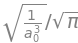

In [4]:
# so then:
N = sqrt(1 / (pi * a0**3))
simplify(N)

We usually write the normalization constant as:

$$
\frac{1}{\sqrt{\pi}}\frac{1}{a_0^{3/2}}
$$

So the full, normalized hydrogen 1s wavefunction is:

$$
\psi(r, \theta, \phi) = \frac{1}{\sqrt{\pi}}\frac{1}{a_0^{3/2}} e^{-r/a_0}
$$

$$
\int_{0}^{2 \pi} \int_{0}^{\pi} \int_{0}^{V} v^{2} \sin \theta d v d\theta d\phi
$$

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>